In [0]:
import pandas as pd
import numpy as np
import cv2

import matplotlib.pyplot as plt

% matplotlib inline

In [0]:
! git clone https://github.com/srijonsarkar/Movie-Genre-Prediction

# github repo which stores all the movie posters downloaded by web-scraping, and the movie genre info csv file

In [0]:
df = pd.read_csv('Movie-Genre-Prediction/movies_metadata_modded.csv')
df.head(10)

,genres,id,imdb_id,original_language,release_date
0,"[{'id': 99, 'name': 'Documentary'}]",315946,tt3155794,xx,1874-12-09
1,"[{'id': 99, 'name': 'Documentary'}]",194079,tt2221420,en,1878-06-14
2,"[{'id': 99, 'name': 'Documentary'}]",426903,tt5459794,en,1883-11-19
3,"[{'id': 99, 'name': 'Documentary'}]",159897,tt2075247,xx,1887-08-18
4,"[{'id': 99, 'name': 'Documentary'}]",96882,tt1758563,xx,1888-01-01
5,"[{'id': 99, 'name': 'Documentary'}]",16464,tt0343112,xx,1888-10-15
6,"[{'id': 99, 'name': 'Documentary'}]",33316,tt1202028,xx,1890-01-01
7,[],386743,tt5285442,en,1890-03-09
8,"[{'id': 35, 'name': 'Comedy'}]",32571,tt0361921,en,1890-11-21
9,[],33315,tt0416046,xx,1890-11-21


In [0]:
# keeping only english movies in dataset
df = df[df.original_language=='en'].copy()
df.shape

(32111, 5)

In [0]:
# have to remove movies released before 1990s
df.release_date = df.release_date.astype('str')
df.release_date = df.release_date.apply(lambda x : x[:4])

In [0]:
df.release_date = df.release_date.astype('int16')
df2 = df[df.release_date >= 1990].copy()
df2.head(20)

,genres,id,imdb_id,original_language,release_date
15648,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
15649,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
15650,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
15651,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
15652,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990
15653,"[{'id': 10749, 'name': 'Romance'}, {'id': 53, ...",41925,tt0099292,en,1990
15655,"[{'id': 27, 'name': 'Horror'}]",67515,tt0100079,en,1990
15658,"[{'id': 10402, 'name': 'Music'}]",44257,tt0099844,en,1990
15659,[],40959,tt0243199,en,1990
15661,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",13293,tt0099260,en,1990


In [0]:
df.dropna(inplace=True)
df.shape

(32101, 5)

In [0]:
df2.head(10)

,genres,id,imdb_id,original_language,release_date
15648,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
15649,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
15650,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
15651,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
15652,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990
15653,"[{'id': 10749, 'name': 'Romance'}, {'id': 53, ...",41925,tt0099292,en,1990
15655,"[{'id': 27, 'name': 'Horror'}]",67515,tt0100079,en,1990
15658,"[{'id': 10402, 'name': 'Music'}]",44257,tt0099844,en,1990
15659,[],40959,tt0243199,en,1990
15661,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",13293,tt0099260,en,1990


In [0]:
df2.reset_index(inplace=True)
df2.head()

,index,genres,id,imdb_id,original_language,release_date
0,15648,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
1,15649,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
2,15650,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
3,15651,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
4,15652,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990


In [0]:
df2.drop('index', axis=1, inplace=True)
df2.head()

,genres,id,imdb_id,original_language,release_date
0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
2,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
4,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990


In [0]:
# remove duplicate rows from df2

df2.drop_duplicates('imdb_id', inplace=True)
df2.shape

(20896, 5)

In [0]:
df2.reset_index(inplace=True)

In [0]:
df2.drop('index',axis=1,inplace=True)
df2.head()

,genres,id,imdb_id,original_language,release_date
0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
2,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
4,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990


In [0]:
# now we have only english movies released after 1990 in our dataset df2
# need to remove movies which don't have any genres specified

l=[]
for i in range(len(df2)):
    if len(eval(df2.iloc[i,0]))==0:
        l.append(i)
        
print(len(l))
  

1050


In [0]:
# need to drop these 1050 rows

df2.drop(l, inplace=True)
df2.shape

(19846, 5)

In [0]:
df2.reset_index(inplace=True)
df2.drop('index',axis=1,inplace=True)
df2.head()

,genres,id,imdb_id,original_language,release_date
0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
2,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
4,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990


In [0]:
# shows how many movies in each genre

dict_g = {}
for i in range(len(df2)):
    genres = eval(df2.iloc[i,0])
    
    for genre in genres:
        if genre['name'] not in dict_g.keys():
            dict_g[str(genre['name'])] = 1
        else:
            dict_g[str(genre['name'])] += 1

In [0]:
dict_g

{'Action': 3050,
 'Adventure': 1602,
 'Animation': 918,
 'Comedy': 6067,
 'Crime': 1783,
 'Documentary': 2969,
 'Drama': 8280,
 'Family': 1669,
 'Fantasy': 1064,
 'Foreign': 541,
 'History': 526,
 'Horror': 2458,
 'Music': 718,
 'Mystery': 1128,
 'Romance': 2830,
 'Science Fiction': 1627,
 'TV Movie': 579,
 'Thriller': 4316,
 'War': 335,
 'Western': 188}

<Figure size 2880x864 with 0 Axes>

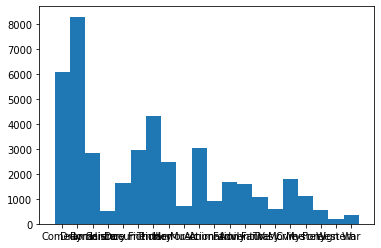

<Figure size 2880x864 with 0 Axes>

In [0]:
plt.bar( dict_g.keys(), dict_g.values(), width=1)
plt.figure(figsize=(40,12))

In [0]:
df2.head(20)

,genres,id,imdb_id,original_language,release_date
0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
2,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
4,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990
5,"[{'id': 10749, 'name': 'Romance'}, {'id': 53, ...",41925,tt0099292,en,1990
6,"[{'id': 27, 'name': 'Horror'}]",67515,tt0100079,en,1990
7,"[{'id': 10402, 'name': 'Music'}]",44257,tt0099844,en,1990
8,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",13293,tt0099260,en,1990
9,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",41810,tt0099017,en,1990


In [0]:
df2.shape

(19846, 5)

In [0]:
genres_dict = {     
     12: "Adventure",
     14: "Fantasy",
     16: "Animation",
     18: "Drama",
     27: "Horror", 
     28: "Action",
     35: "Comedy",
     36: "History", 
     37: "Western",     
     53: "Thriller",
     80: "Crime",  
     99: "Documentary",
     878: "Science Fiction", 
     9648: "Mystery",    
     10402: "Music",     
     10749: "Romance",     
     10751: "Family",    
     10752: "War",     
     10769: "Foreign", 
     10770: "TV Movie", }

In [0]:
# need to extract labels(genres) of each poster now and insert into Ydata
# and also process each poster into numpy arrays and insert into Xdata

import os
from tensorflow.keras.preprocessing import image

dir = './Movie-Genre-Prediction/en_90/'
dir2= './Movie-Genre-Prediction/images/'

labels = []

x_data = []
y_data = []

poster_shape = (268, 182, 3)

for i,row in df2.iterrows():
  
  row_genre = { genre['id'] for genre in eval(row['genres']) if genre['id'] in genres_dict }
  image_loc = dir + str(row['imdb_id']) + '.jpg'
  image_loc2= dir2 + str(row['imdb_id']) + '.jpg'
  
  if os.path.exists(image_loc):

    poster = cv2.imread(image_loc)

    if poster.shape == poster_shape:
      x_data.append(poster)
      y_data.append(row_genre)
  
  elif os.path.exists(image_loc2):
    
    
    poster = cv2.imread(image_loc2)
    
    if poster.shape == poster_shape:
      x_data.append(poster)
      y_data.append(row_genre)
  

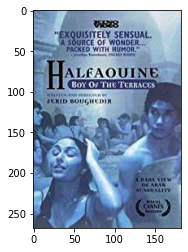

In [0]:
plt.imshow(x_data[0])

In [0]:
len(x_data)

18938

In [0]:
!pip install scikit-multilearn

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer 
from skmultilearn.model_selection import iterative_train_test_split

genre_list = list(genres_dict.keys())

mlb = MultiLabelBinarizer(classes=genre_list)
Y_data = mlb.fit_transform(y_data)

X_data = np.array(x_data)

In [0]:
X_train, Y_train, X_test, Y_test = iterative_train_test_split(X_data, Y_data, test_size = 0.33)


In [0]:
del X_data
del Y_data
del df
del df2

In [0]:
print(len(X_train))
print(len(X_test))

12644
6294


In [0]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

model1 = VGG19(weights='imagenet', include_top=False)
model1.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
X_train_pro = preprocess_input(X_train)

In [0]:
X_train_pro[0].shape

(268, 182, 3)

In [0]:
# need to get extracted features of our XTrain and XTest after passing through the VGG19 model

train_features = model1.predict(X_train_pro)

In [0]:
train_features.shape

(12644, 8, 5, 512)

In [0]:
# features for each image have to now be transformed into a single dimensional vector of length 8*5*512

features_size = 8*5*512

np_features = np.zeros((train_features.shape[0], features_size))
for i in range(train_features.shape[0]):
    feat = train_features[i]
    reshaped_feat = feat.reshape(1,-1)
    np_features[i] = reshaped_feat


In [0]:
print(features_size)

20480


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential([
    Dense(1024, input_shape=(features_size,)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(20),
    Activation('sigmoid'),
])

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy']) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              20972544  
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                5140      
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
Total params: 21,240,084
Trainable params: 21,240,084
Non-trainable params: 0
____________________________________________

In [0]:
history = model.fit( np_features, Y_train, batch_size=500, epochs=45, verbose=1)

Epoch 1/45
26/26 [==============================] - 1s 54ms/step - loss: 4.0266 - categorical_accuracy: 0.2208
Epoch 2/45
26/26 [==============================] - 1s 55ms/step - loss: 0.4890 - categorical_accuracy: 0.3196
Epoch 3/45
26/26 [==============================] - 1s 54ms/step - loss: 0.2356 - categorical_accuracy: 0.4244
Epoch 4/45
26/26 [==============================] - 1s 54ms/step - loss: 0.1574 - categorical_accuracy: 0.5108
Epoch 5/45
26/26 [==============================] - 1s 54ms/step - loss: 0.1212 - categorical_accuracy: 0.5431
Epoch 6/45
26/26 [==============================] - 1s 55ms/step - loss: 0.0923 - categorical_accuracy: 0.5801
Epoch 7/45
26/26 [==============================] - 1s 54ms/step - loss: 0.0736 - categorical_accuracy: 0.5948
Epoch 8/45
26/26 [==============================] - 1s 55ms/step - loss: 0.0588 - categorical_accuracy: 0.6146
Epoch 9/45
26/26 [==============================] - 1s 54ms/step - loss: 0.0460 - categorical_accuracy: 0.6167
E

In [0]:
model.save('vgg19.h5')

In [0]:
# implementing subset accuracy

def accuracy_metric( y_pred, y_data ):
  
  # y_pred is list of list of floats, while y_data is one hot encoded genres
  accuracy = 0
  
  for i in range(len(y_pred)):
    
    pred_genres = y_pred[i].argsort()[-3:]                   # will return indices of top 3 predictions
    z_pred = np.zeros(len(genres_dict))
    z_pred[pred_genres[0]] =  1
    z_pred[pred_genres[1]] =  1
    z_pred[pred_genres[2]] =  1
    
    num = np.dot(z_pred, y_data[i])
    denum = np.logical_or(z_pred, y_data[i]).sum()
    accuracy += num / denum
    
  return accuracy / len(y_pred)

In [0]:
X_test = preprocess_input(X_test)
test_features = model1.predict(X_test)

In [0]:
# now we need to see subset accuracy on test data


np_features = np.zeros((test_features.shape[0],features_size))
for i in range(test_features.shape[0]):
    feat = test_features[i]
    reshaped_feat = feat.reshape(1,-1)
    np_features[i] = reshaped_feat

out = model.predict(np.array( np_features , dtype=np.float32))
accuracy_metric(out, Y_test)*100

27.342467757148096

In [0]:
# function to print poster with its true and predicted values

import random
from PIL import Image
from matplotlib.pyplot import imshow

% matplotlib inline

def test_sample(sample):
  
  plt.imshow(X_test[sample])
  
  genre_ind = list(genres_dict.keys())

  print('True Values :') 

  count = np.sum(Y_test[sample])
  true_genres = Y_test[sample].argsort()[-count:]
  l = []
  for j in range(count):
    l.append(genres_dict[genre_ind[true_genres[j]]])
  l.sort()
  print(l)
  
  print('Predicted Values')     
  prediction = model.predict(np.array([np_features[sample]], dtype=np.int8)) 
  pred_genres = prediction[0].argsort()[-3:]                   # will return indices of top 3 predictions
  
  
  l=[]
  l.append(genres_dict[genre_ind[pred_genres[0]]])
  l.append(genres_dict[genre_ind[pred_genres[1]]])
  l.append(genres_dict[genre_ind[pred_genres[2]]])
  l.sort()
  print(l)
  
  print('-' * 40)

Text(0.5, 1.0, 'Categorical Accuracy ')

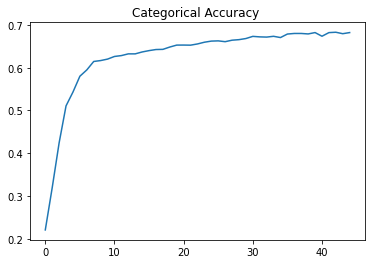

In [0]:
plt.plot(history.history['categorical_accuracy'])
plt.title('Categorical Accuracy ')

Text(0, 0.5, 'Binary Cross-Entropy Loss')

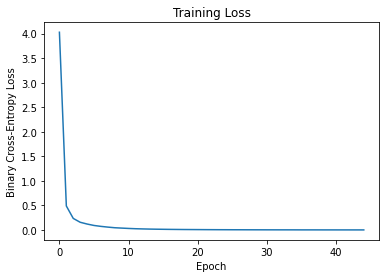

In [0]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True Values :
['Drama']
Predicted Values
['Documentary', 'Drama', 'Mystery']
----------------------------------------


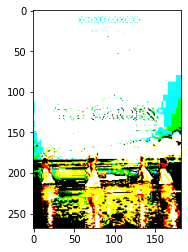

In [0]:
test_sample(103)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True Values :
['Comedy']
Predicted Values
['Comedy', 'Romance', 'TV Movie']
----------------------------------------


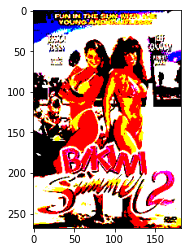

In [0]:
test_sample(309)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True Values :
['Drama', 'Horror', 'Thriller']
Predicted Values
['Drama', 'Mystery', 'Thriller']
----------------------------------------


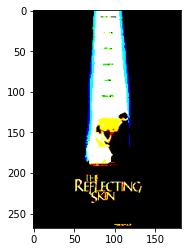

In [0]:
test_sample(100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True Values :
['Drama', 'Romance']
Predicted Values
['Comedy', 'Drama', 'Romance']
----------------------------------------


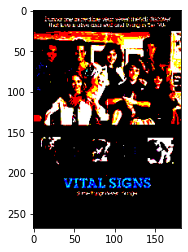

In [0]:
test_sample(50)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True Values :
['Drama', 'Romance']
Predicted Values
['Comedy', 'Drama', 'Romance']
----------------------------------------


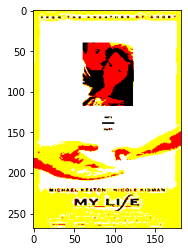

In [0]:
test_sample(608)